In [2]:
import math
import numpy as np
import scipy.stats
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
%matplotlib inline

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

# FROM HYPOTHESIS TESTING TO PARAMETER ESTIMATION

Is the Carnival Game Really Fair?

In [3]:
p = 0.5
k = 24
n = 100

In [4]:
binom.cdf(k=k, n=n, p=p)

9.050013106514625e-08

In [5]:
dx = 0.01
htess = np.arange(start=0, stop=1.01, step=dx)

In [6]:
h_bottom = 0.5

In [7]:
def bayes_factor(h_top, h_bottom):
    ratio = ((h_top**24) * (1-h_top)**76) / ((h_bottom**24) * (1-h_bottom)**76)
    return ratio

In [8]:
bfs = []
for val in htess:
    bfs.append(bayes_factor(val, h_bottom))

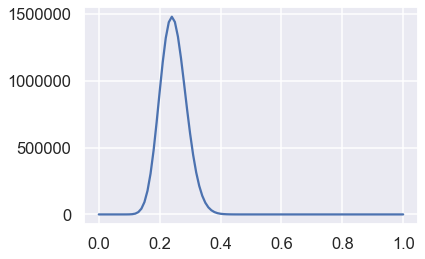

In [9]:
sns.lineplot(htess, bfs)

In [10]:
max(bfs)

1478775.9567598568

In [11]:
bfs.index(max(bfs))

24

In [12]:
htess[bfs.index(max(bfs))]

0.24

### Adding Priors to Our Likelihood Ratios

In [13]:
priors = []
for val in htess:
    if val <= 0.3 and val >= 0.2:
        prior = 0.001
    else:
        prior = 1
    priors.append(prior)

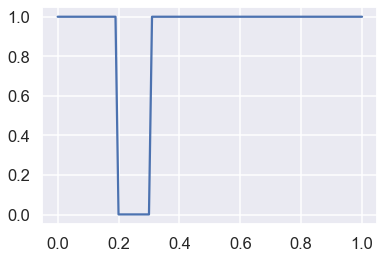

In [14]:
sns.lineplot(htess, priors)

In [15]:
priors = np.array(priors)

In [16]:
posteriors = priors * bfs

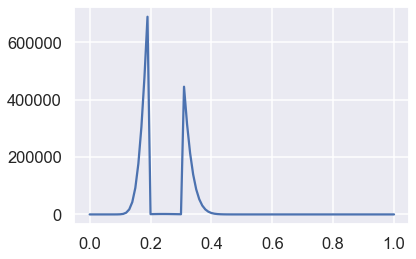

In [17]:
sns.lineplot(htess, posteriors)

In [18]:
sum(posteriors)

3140687.468075799

Normalizing posteriors

In [19]:
p_posteriors = posteriors/sum(posteriors)

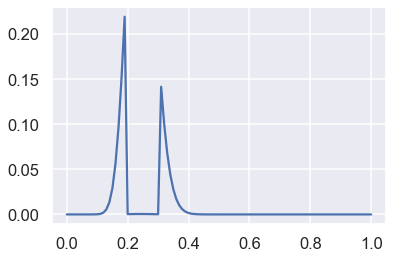

In [20]:
sns.lineplot(htess, p_posteriors)

In [21]:
filtr = np.where(htess < 0.5)

In [22]:
sum(p_posteriors[filtr])

0.9999995179170433

In [23]:
sum(p_posteriors * htess)

0.24027039578371676

In [24]:
max_filtr = np.where(max(p_posteriors))

In [25]:
max(p_posteriors)

0.21924146853825416

In [26]:
likely = np.where(p_posteriors == max(p_posteriors))

In [27]:
htess[likely]

array([0.19])

From the Bayes Factor to Parameter Estimation

In [28]:
num_of_trials = 1000   # number of times we will simulate an event
a = 24
b = 76
r = beta.rvs(a, b, size=num_of_trials)

(0, 1)

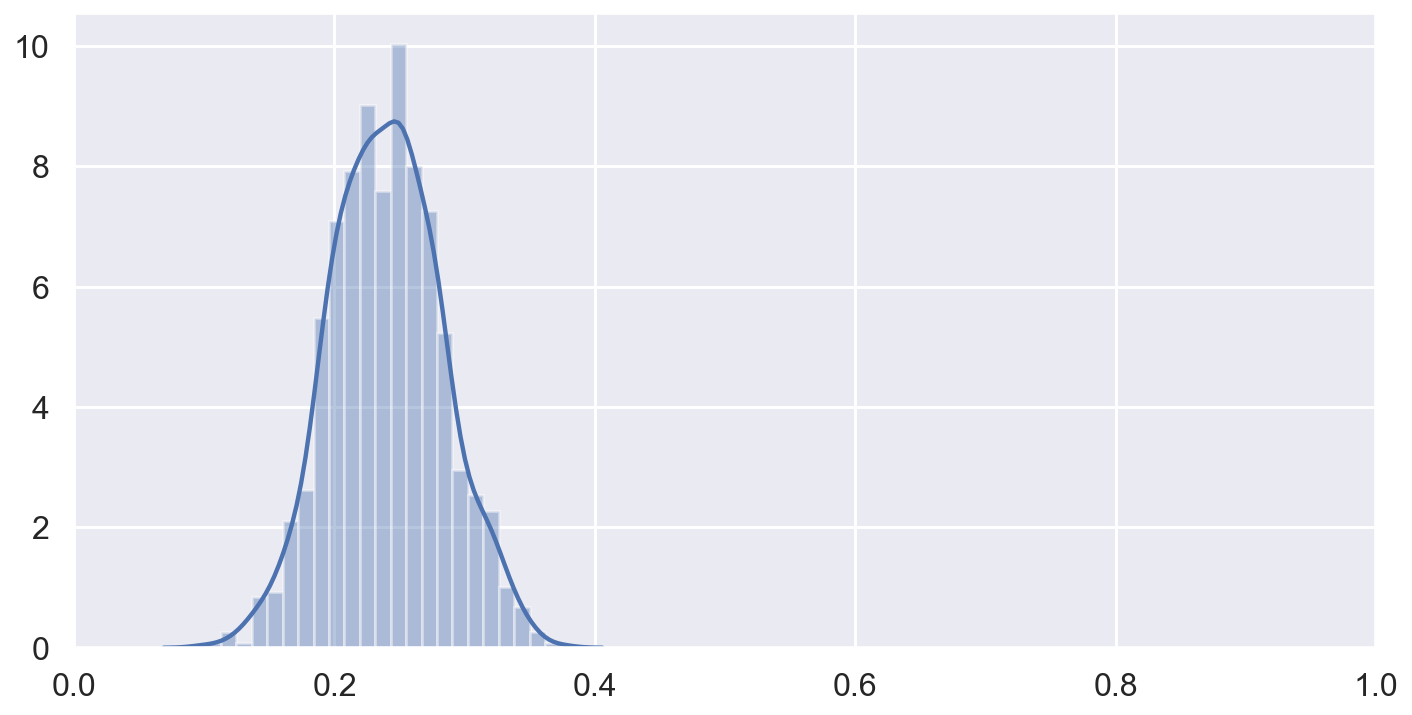

In [29]:
plt.figure(figsize=(12,6), dpi=140)

ax = sns.distplot(r)
ax.set_xlim(0, 1)

In [30]:
num_of_trials = 1000   # number of times we will simulate an event
a = 24
b = 76
r = beta.rvs(a + 1, b + 1, size=num_of_trials)

(0, 1)

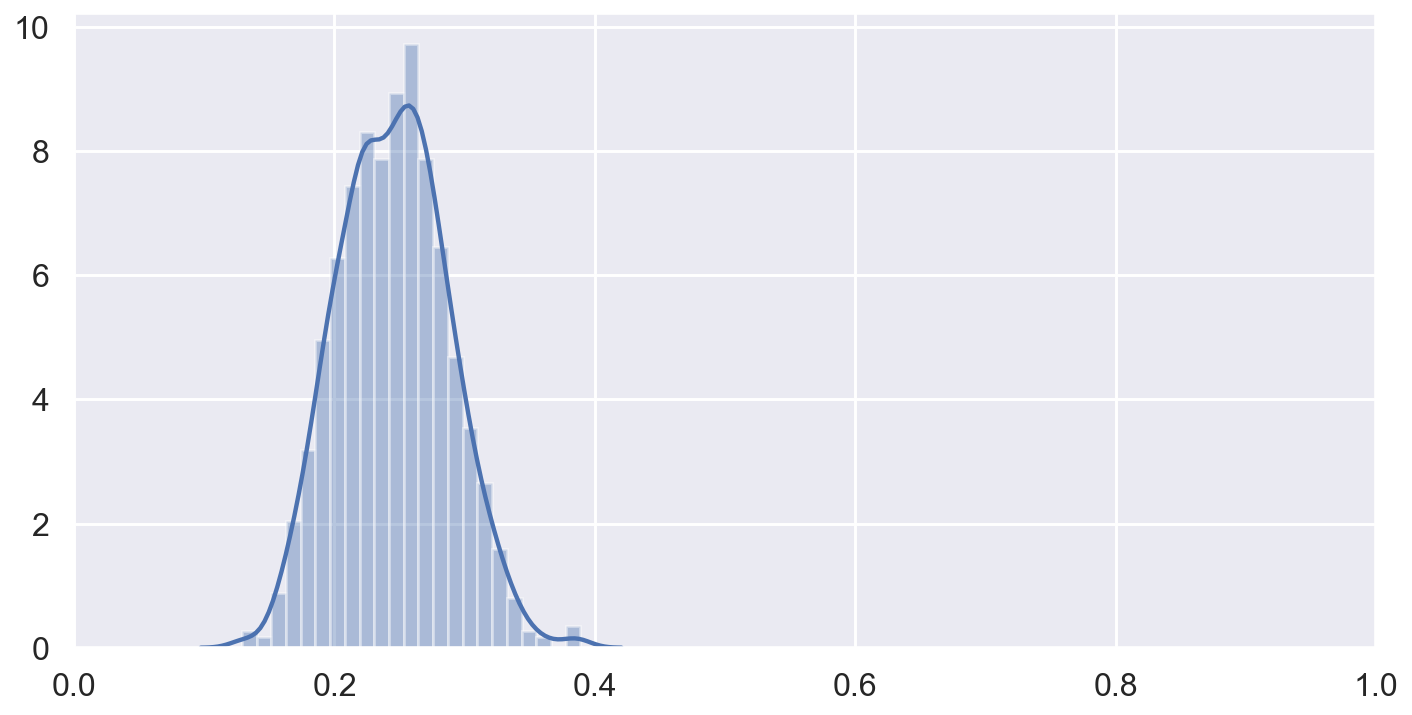

In [31]:
plt.figure(figsize=(12,6), dpi=140)

ax = sns.distplot(r)
ax.set_xlim(0, 1)

### 1. Our Bayes factor assumed that we were looking at H1: P(prize) = 0.5. This allowed us to derive a version of the beta distribution with an alpha of 1 and a beta of 1. Would it matter if we chose a different probability for H1 ? Assume H1 is P(prize) = 0.24 , then see if the resulting distribution, once normalized to sum to 1, is any different than the original hypothesis.

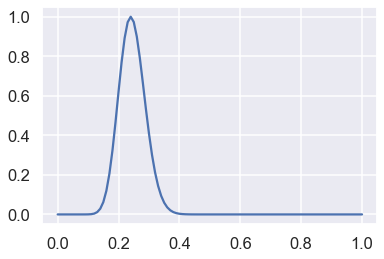

In [32]:
dx = 0.01
h_bottom = 0.24
htess = np.arange(start=0, stop=1.01, step=dx)
bfs = []
for val in htess:
    bfs.append(bayes_factor(val, h_bottom))

sns.lineplot(htess, bfs)

### 2. Write a prior for the distribution in which each hypothesis is 1.05 times more likely than the previous hypothesis (assume our dx remains the same).

In [33]:
len(bfs)

101

In [34]:
vals = [1]
for i in range(len(bfs) - 1):
    vals.append(1.05)

In [35]:
priors = np.cumprod(vals)

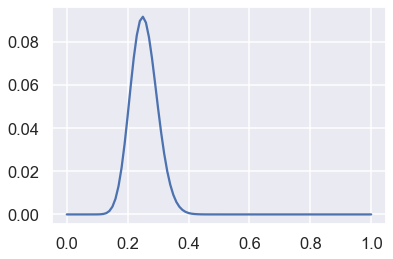

In [36]:
posteriors = bfs * priors
p_posteriors = posteriors/sum(posteriors)
sns.lineplot(htess, p_posteriors)

### 3. Suppose you observed another duck game that included 34 ducks with prizes and 66 ducks without prizes. How would you set up a test to determine “What is the probability that you have a better chance of winning a prize in this game than in the game we used in our example?” Implementing this requires a bit more sophistication than the R used in this book, but see if you can learn this on your own to kick off your adventures in more advanced Bayesian statistics!

In [44]:
# Old game
num_of_trials = 100000   # number of times we will simulate an event
a = 24
b = 76
A = beta.rvs(a + 1, b + 1, size=num_of_trials)

In [45]:
# New game
a2 = 34
b2 = 66
B = beta.rvs(a2 + 1, b2 + 1, size=num_of_trials)

In [46]:
sum(B > A)/num_of_trials

0.93807

In [48]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [49]:
ratios = B/A

In [50]:
x, y = ecdf(ratios)

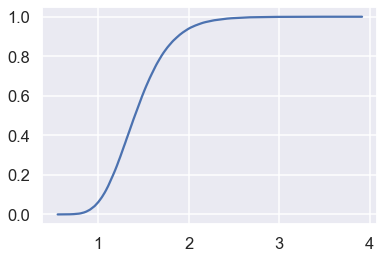

In [51]:
sns.lineplot(x, y) 

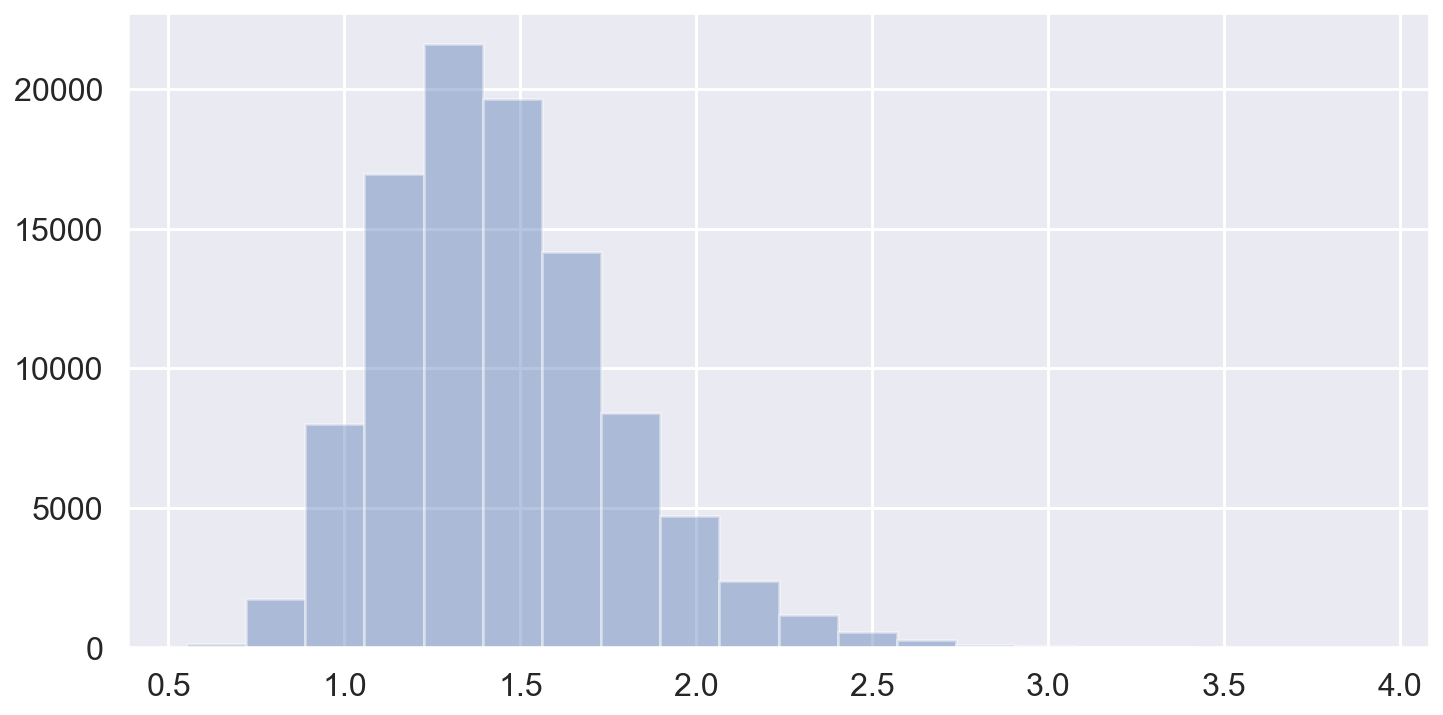

In [52]:
plt.figure(figsize=(12,6), dpi=140)
sns.distplot(ratios, kde=False, bins=20)

The author said that to solve this problem you will need to use a different approach than the one presented in the A/B testing chapter, although I am not sure why. I might be missing something, but I consider this problem to be very similar to what we have seen with e-mail conversion rates in chapter 15.